# Project Prototype 

In [1]:
import pandas as pd
Mortality = pd.read_csv("Mortality Both Sexes.csv")
MortalityF = pd.read_csv("Mortality Female.csv")
MortalityM = pd.read_csv("Mortality Male.csv")
Alcohol = pd.read_csv("WHOAlcoholTotalPerCapita_2021-09-20v2.csv")

#new things
Mortality = Mortality[Mortality['Period']>=2000]
Mortality = Mortality[Mortality['Period']<=2016]
Mortality = Mortality.drop(columns = 'DateModified', axis= '1')


Alcohol = Alcohol[Alcohol['Year']>=2000]
Alcohol = Alcohol[Alcohol['Year']<=2016]
Alcohol = Alcohol.drop(columns = {'WHO Region Code',
                                  'Country Code','Alcohol total per capita (15+) consumption in liters (string)'},
                       axis= '1')



#more cleanup!!!!
import seaborn as sns


Mortality = Mortality[Mortality['Location']!= 'South Sudan']
Mortality = Mortality[Mortality['Location']!= 'Sudan']

Alcohol = Alcohol[Alcohol['Country']!='Cook Islands']
Alcohol = Alcohol[Alcohol['Country']!='Dominica']
Alcohol = Alcohol[Alcohol['Country']!='Nauru']
Alcohol = Alcohol[Alcohol['Country']!='Niue']
Alcohol = Alcohol[Alcohol['Country']!='Saint Kitts and Nevis']
Alcohol = Alcohol[Alcohol['Country']!='Surinam']
Alcohol = Alcohol[Alcohol['Country']!='Tuvalu']
Alcohol = Alcohol[Alcohol['Country']!='Andorra']

### Question 1


In [2]:
Mortality.head()

,Unnamed: 0,ParentLocation,Location,Period,Sex,Adult mortality rate
0,0,Americas,Barbados,2016,Both sexes,100.4
1,1,Europe,Serbia,2016,Both sexes,102.5
2,2,Europe,Turkey,2016,Both sexes,104.0
3,3,Europe,Slovakia,2016,Both sexes,104.1
4,4,Western Pacific,Samoa,2016,Both sexes,110.4


### Question 2

In [3]:
Alcohol.head()

,WHO Region,Country,Year,Sex,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
1692,Eastern Mediterranean,Kuwait,2016,Both sexes,0.0,0.0,0.0
1693,Eastern Mediterranean,Kuwait,2016,Female,0.0,0.0,0.0
1694,Eastern Mediterranean,Kuwait,2016,Male,0.0,0.0,0.0
1695,Africa,Mauritania,2016,Both sexes,0.0,0.0,0.0
1696,Africa,Mauritania,2016,Female,0.0,0.0,0.0


In [4]:
# YearAlcohol = Alcohol.groupby("Year")["Alcohol total per capita (15+) consumption in liters (numeric)"].mean()

# YearAlcohol

byYearMortality = Mortality.groupby('Period').mean()

byYearMortality = byYearMortality.rename_axis('Period').reset_index()


byYearMortality

YearAlcohol = Alcohol.groupby("Year").mean()

YearAlcohol = YearAlcohol.rename_axis("Year").reset_index()



YearAlcohol

complete_df = pd.merge(YearAlcohol, byYearMortality, left_on = ['Year'],right_on = ['Period'])

complete_df = complete_df.drop(columns=['Alcohol total per capita (15+) consumption in liters (low estimation)',
                                        'Alcohol total per capita (15+) consumption in liters (high estimation)',
                                        'Unnamed: 0',
                                        'Period'
                                       ])
complete_df

,Year,Alcohol total per capita (15+) consumption in liters (numeric),Adult mortality rate
0,2000,5.858540,219.176630
1,2001,5.858540,216.817569
2,2002,5.835976,215.948453
3,2003,5.817453,214.913536
4,2004,5.848881,212.267845
5,2005,5.909400,208.489337
6,2006,5.986886,203.597790
7,2007,6.096549,197.977624
8,2008,6.023707,192.474475
9,2009,5.943344,186.281492


### Question 3


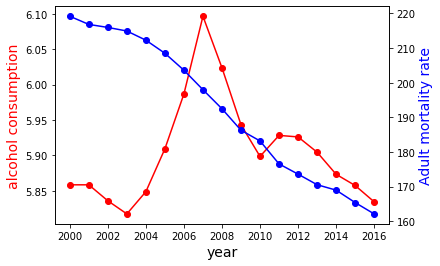

In [5]:
#Akira's part


import matplotlib.pyplot as plt
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(complete_df["Year"], complete_df["Alcohol total per capita (15+) consumption in liters (numeric)"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("alcohol consumption",color="red",fontsize=14)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(complete_df["Year"], complete_df["Adult mortality rate"], color="blue",marker="o")
ax2.set_ylabel("Adult mortality rate",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')




In [6]:
#take the max alcohol consumption and min consumption and see if there is any trend
YearAlcoholMax = Alcohol.groupby("Year").max()
YearAlcoholMin = Alcohol.groupby("Year").min()


# YearAlcohol = YearAlcohol.rename_axis("Year").reset_index()

YearAlcoholMax = YearAlcoholMax.rename_axis("Year").reset_index()
YearAlcoholMin = YearAlcoholMin.rename_axis("Year").reset_index()

YearAlcoholMax


,Year,WHO Region,Country,Sex,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
0,2000,Western Pacific,Zimbabwe,Male,29.89,25.97,34.49
1,2001,Western Pacific,Zimbabwe,Male,29.89,25.97,34.49
2,2002,Western Pacific,Zimbabwe,Male,31.44,27.49,36.02
3,2003,Western Pacific,Zimbabwe,Male,30.49,26.73,35.29
4,2004,Western Pacific,Zimbabwe,Male,27.60,24.31,33.26
5,2005,Western Pacific,Zimbabwe,Male,27.86,24.43,33.14
6,2006,Western Pacific,Zimbabwe,Male,28.29,24.93,33.30
7,2007,Western Pacific,Zimbabwe,Male,28.48,24.76,33.45
8,2008,Western Pacific,Zimbabwe,Male,27.85,24.27,32.75
9,2009,Western Pacific,Zimbabwe,Male,26.87,23.39,31.54


In [43]:
alcdata_2003 = Alcohol[Alcohol["Year"] == 2003]
alcdata_2007 = Alcohol[Alcohol["Year"] == 2007]


alcdata_2003 = alcdata_2003.groupby("Country").mean().reset_index()


alcdata_2007 = alcdata_2007.groupby("Country").mean().reset_index()

alcdata_2007
alcdata_2007.sort_values(by="Alcohol total per capita (15+) consumption in liters (numeric)")
# alcdata_2003["Alcohol total per capita (15+) consumption in liters (numeric)"] < alcdata_2007["Alcohol total per capita (15+) consumption in liters (numeric)"]

,Country,Year,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
88,Kuwait,2007.0,0.000000,0.000000,0.000000
104,Mauritania,2007.0,0.000000,0.000000,0.000000
140,Saudi Arabia,2007.0,0.000000,0.000000,0.000000
149,Somalia,2007.0,0.000000,0.000000,0.000000
12,Bangladesh,2007.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
133,Romania,2007.0,16.420000,14.220000,19.116667
109,Montenegro,2007.0,16.806667,14.303333,19.483333
54,Estonia,2007.0,16.930000,14.376667,20.620000
96,Lithuania,2007.0,17.076667,15.153333,20.070000


In [8]:
alcdata_2003

,Country,Year,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
0,Afghanistan,2003.0,0.034667,0.028000,0.094000
1,Albania,2003.0,7.173333,5.730000,8.606667
2,Algeria,2003.0,0.406667,0.336667,0.570000
3,Angola,2003.0,3.620000,2.633333,4.653333
4,Antigua and Barbuda,2003.0,5.256667,4.050000,6.830000
...,...,...,...,...,...
174,Venezuela (Bolivarian Republic of),2003.0,8.423333,6.900000,9.993333
175,Viet Nam,2003.0,2.296667,1.536667,3.180000
176,Yemen,2003.0,0.516667,0.117333,1.073333
177,Zambia,2003.0,2.886667,2.336667,3.576667


In [38]:
# df3 = alcdata_2007[alcdata_2007['Country'].isin(alcdata_2003['Country'])]
merged = pd.merge(alcdata_2007, alcdata_2003, how='inner', on=['Country'])
merged_sub = merged[merged["Alcohol total per capita (15+) consumption in liters (numeric)_x"] - 
      merged["Alcohol total per capita (15+) consumption in liters (numeric)_y"] > 0]

mor = Mortality.groupby("Location").agg({'Adult mortality rate': 'sum', 'ParentLocation': 'first'})


all_merged_data = pd.merge(merged_sub, mor, how="inner", left_on = ['Country'], right_on=["Location"])
all_merged_data
grp = all_merged_data.groupby("ParentLocation").count()
# g
all_merged_data["diff"] = all_merged_data["Alcohol total per capita (15+) consumption in liters (numeric)_x"] - all_merged_data["Alcohol total per capita (15+) consumption in liters (numeric)_y"] 
# grp
sorted_diff_all_merged_data = all_merged_data.sort_values(by="diff")
#top 5 countries where alcohol consumption increased from 2003 to 2007
sorted_diff_all_merged_data

,Country,Year_x,Alcohol total per capita (15+) consumption in liters (numeric)_x,Alcohol total per capita (15+) consumption in liters (low estimation)_x,Alcohol total per capita (15+) consumption in liters (high estimation)_x,Year_y,Alcohol total per capita (15+) consumption in liters (numeric)_y,Alcohol total per capita (15+) consumption in liters (low estimation)_y,Alcohol total per capita (15+) consumption in liters (high estimation)_y,Adult mortality rate,ParentLocation,diff
61,Niger,2007.0,0.261667,0.107000,0.580000,2003.0,0.254000,0.098333,0.570000,4674.30,Africa,0.007667
0,Afghanistan,2007.0,0.043333,0.034333,0.110333,2003.0,0.034667,0.028000,0.094000,4527.70,Eastern Mediterranean,0.008667
45,Iran (Islamic Republic of),2007.0,1.016667,0.349000,1.833333,2003.0,1.003333,0.354667,1.786667,2042.66,Eastern Mediterranean,0.013333
60,Nicaragua,2007.0,5.330000,4.306667,6.633333,2003.0,5.310000,4.136667,6.613333,2877.30,Americas,0.020000
57,Morocco,2007.0,0.520000,0.383333,0.780000,2003.0,0.496667,0.366000,0.753333,1741.89,Eastern Mediterranean,0.023333
...,...,...,...,...,...,...,...,...,...,...,...,...
2,Angola,2007.0,6.180000,4.940000,7.490000,2003.0,3.620000,2.633333,4.653333,5054.00,Africa,2.560000
32,Estonia,2007.0,16.930000,14.376667,20.620000,2003.0,13.403333,11.003333,16.460000,2802.20,Europe,3.526667
51,Latvia,2007.0,12.733333,10.836667,15.380000,2003.0,9.086667,7.270000,11.250000,3286.40,Europe,3.646667
38,Georgia,2007.0,9.940000,8.433333,11.826667,2003.0,4.800000,3.766667,6.033333,2529.10,Europe,5.140000


1751    278.8
Name: Adult mortality rate, dtype: float64 2496    325.0
Name: Adult mortality rate, dtype: float64
1741    245.6
Name: Adult mortality rate, dtype: float64 2452    207.2
Name: Adult mortality rate, dtype: float64
1712    186.5
Name: Adult mortality rate, dtype: float64 2448    197.1
Name: Adult mortality rate, dtype: float64
1733    230.3
Name: Adult mortality rate, dtype: float64 2475    254.4
Name: Adult mortality rate, dtype: float64
1749    278.3
Name: Adult mortality rate, dtype: float64 2476    258.2
Name: Adult mortality rate, dtype: float64


1751    278.8
Name: Adult mortality rate, dtype: float64

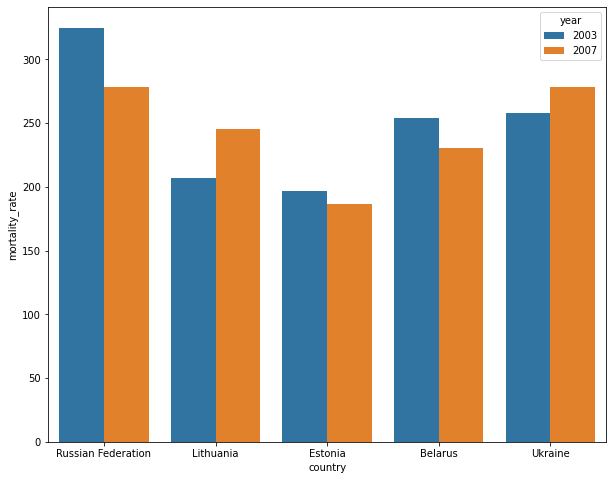

In [42]:
mor_2003 = Mortality[Mortality["Period"] == 2003]
mor_2007 = Mortality[Mortality["Period"] == 2007]

num = mor_2007[mor_2007["Location"] == "Russian Federation"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Russian Federation"]["Adult mortality rate"]
print(num, num2)

num = mor_2007[mor_2007["Location"] == "Lithuania"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Lithuania"]["Adult mortality rate"]

print(num, num2)

num = mor_2007[mor_2007["Location"] == "Estonia"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Estonia"]["Adult mortality rate"]

print(num, num2)

num = mor_2007[mor_2007["Location"] == "Belarus"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Belarus"]["Adult mortality rate"]

print(num, num2)

num = mor_2007[mor_2007["Location"] == "Ukraine"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Ukraine"]["Adult mortality rate"]

print(num, num2)

#make figure for this.

# 278.8, 245.6, 186.5, 230.3, 278.3
# 325.0, 207.2, 197.1, 254.4, 258.2
# Russian Federation, Lithuania, Estonia, Belarus, Ukraine

# ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

# x = country, y = total alcohol consumption per year, hue = 2003 or 2007

# assign data of lists.  
# data = {'Name': ['Tom', 'Joseph', 'Krish', 'John'], 'Age': [20, 21, 19, 18]}  
  
# Create DataFrame  
# df = pd.DataFrame(data)  

data = {"country": ["Russian Federation", "Russian Federation", "Lithuania", "Lithuania",  "Estonia", "Estonia", 
                    "Belarus","Belarus", "Ukraine", "Ukraine"], "mortality_rate": 
       [278.8, 325.0, 245.6, 207.2, 186.5, 197.1, 230.3, 254.4, 278.3, 258.2], "year": [2007, 2003, 2007, 2003, 2007, 2003, 2007, 2003,2007, 2003]}

df = pd.DataFrame(data)  
df

plt.figure(figsize=(10,8))
ax = sns.barplot(x="country", y="mortality_rate", hue="year", data=df)


num = mor_2007[mor_2007["Location"] == "Russian Federation"]["Adult mortality rate"]
num

134    17.86
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64 133    17.263333
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64
96    17.076667
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64 96    16.333333
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64
54    16.93
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64 54    13.403333
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64
14    15.373333
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64 14    13.026667
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64
168    14.466667
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float64 166    12.89
Name: Alcohol total per capita (15+) consumption in liters (numeric), dtype: float6

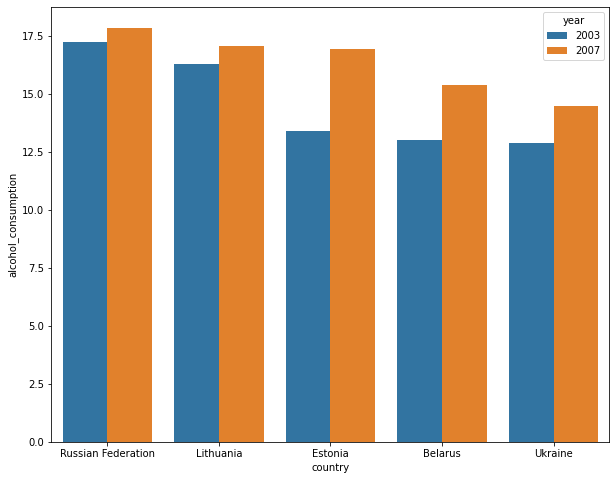

In [37]:
mor_2003 = Mortality[Mortality["Period"] == 2003]
mor_2007 = Mortality[Mortality["Period"] == 2007]

num = mor_2007[mor_2007["Location"] == "Mongolia"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Mongolia"]["Adult mortality rate"]
print(num, num2)

num = mor_2007[mor_2007["Location"] == "Georgia"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Georgia"]["Adult mortality rate"]

print(num, num2)

num = mor_2007[mor_2007["Location"] == "Latvia"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Latvia"]["Adult mortality rate"]

print(num, num2)

num = mor_2007[mor_2007["Location"] == "Estonia"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Estonia"]["Adult mortality rate"]

print(num, num2)

num = mor_2007[mor_2007["Location"] == "Angola"]["Adult mortality rate"]
num2 = mor_2003[mor_2003["Location"] == "Angola"]["Adult mortality rate"]

print(num, num2)


data = {"country": ["Mongolia", "Mongolia", "Georgia", "Georgia",  "Latvia", "Latvia", 
                    "Estonia","Estonia", "Angola", "Angola"], "mortality_rate": 
       [250.5, 265.1, 140.2, 143.8, 223.7, 212.1, 186.5, 197.1, 302.8, 343.2], "year": [2007, 2003, 2007, 2003, 2007, 2003, 2007, 2003,2007, 2003]}

df = pd.DataFrame(data)  
df

plt.figure(figsize=(10,8))
ax = sns.barplot(x="country", y="mortality_rate", hue="year", data=df)



### Question 4

In [ ]:
from sklearn.linear_model import LinearRegression
from bokeh.models import Slope
from bokeh.io import output_notebook
output_notebook()
bokeh_width, bokeh_height = 800, 600

#separate these in different cells

from bokeh.io import show
from bokeh.plotting import gmap
from bokeh.models import GMapOptions
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256 as palette

p = figure(width=600, height=400)

p.yaxis.axis_label = "Mortaltity"
p.xaxis.axis_label = "Year"


x = sorted_df_latency["dis"]
y = sorted_df_latency["latency_avg"]
model = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
slope = model.coef_[0]
intercept = model.intercept_
regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

# p.add_layout(regression_line)
p.circle(x="dis", y="latency_avg", size=10, hover_color="red", source=sorted_df_latency)

# p.circle(x, y, fill_color="white", size=8)
show(p)